In [3]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd
timelimit = 30
result=[]
# np.random.seed(1)
for i in range(1, 19):
    problem_file = f'STAGE1_{i}.json'
    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    alg_start_time = time.time()

    exception = None

    solution = None
    try:
        # Run algorithm!
        solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
    except Exception as e:
        exception = f'{e}'


    alg_end_time = time.time()

    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

    checked_solution['time'] = alg_end_time - alg_start_time
    checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
    checked_solution['exception'] = exception

    checked_solution['prob_name'] = prob['name']
    checked_solution['prob_file'] = problem_file

    result.append(checked_solution)
    
df=pd.DataFrame(result)
df.sort_values(by='avg_cost',ascending=False)

,total_cost,avg_cost,num_drivers,total_dist,feasible,infeasibility,bundles,time,timelimit_exception,exception,prob_name,prob_file
12,539258.6,5392.586000,59,173035,True,None,"[[BIKE, [0, 24, 28], [0, 28, 24]], [CAR, [1], ...",0.245042,False,None,STAGE1_13,STAGE1_13.json
14,950474.8,4752.374000,102,412648,True,None,"[[BIKE, [35, 0, 43], [35, 43, 0]], [CAR, [1], ...",0.532647,False,None,STAGE1_15,STAGE1_15.json
13,459800.4,4598.004000,39,232734,True,None,"[[BIKE, [0, 8, 62], [62, 0, 8]], [CAR, [1, 81]...",0.037452,False,None,STAGE1_14,STAGE1_14.json
17,1327639.6,4425.465333,109,665045,True,None,"[[BIKE, [0, 69, 184], [0, 184, 69]], [CAR, [1,...",0.199696,False,None,STAGE1_18,STAGE1_18.json
0,408764.6,4087.646000,43,138299,True,None,"[[CAR, [12, 0], [0, 12]], [CAR, [1, 41], [1, 4...",0.086120,False,None,STAGE1_1,STAGE1_1.json
15,789206.2,3946.031000,76,411658,True,None,"[[BIKE, [0, 106, 164], [0, 106, 164]], [CAR, [...",0.100010,False,None,STAGE1_16,STAGE1_16.json
1,393136.4,3931.364000,39,146620,True,None,"[[CAR, [0, 5], [5, 0]], [BIKE, [21, 1, 2], [2,...",0.045085,False,None,STAGE1_2,STAGE1_2.json
16,1177467.0,3924.890000,133,634843,True,None,"[[BIKE, [23, 114, 0], [0, 23, 114]], [CAR, [1,...",0.847536,False,None,STAGE1_17,STAGE1_17.json
7,389823.9,3898.239000,40,133603,True,None,"[[CAR, [1, 0], [1, 0]], [BIKE, [37, 2], [37, 2...",0.040904,False,None,STAGE1_8,STAGE1_8.json
6,387168.8,3871.688000,42,121534,True,None,"[[BIKE, [1, 0, 8], [1, 0, 8]], [CAR, [12, 2], ...",0.049890,False,None,STAGE1_7,STAGE1_7.json


In [22]:
df.mean()

C:\Users\cjfgh\AppData\Local\Temp\ipykernel_20424\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


total_cost             731802.244444
avg_cost                 3798.364259
num_drivers                79.166667
total_dist             301203.944444
feasible                    1.000000
infeasibility                    NaN
time                        0.201828
timelimit_exception         0.000000
exception                        NaN
dtype: float64

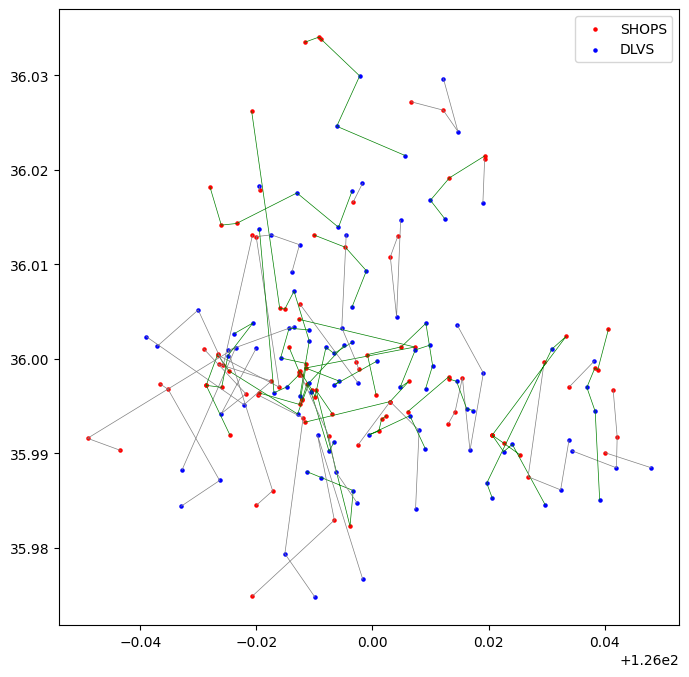

In [6]:
draw_route_solution(ALL_ORDERS, checked_solution)

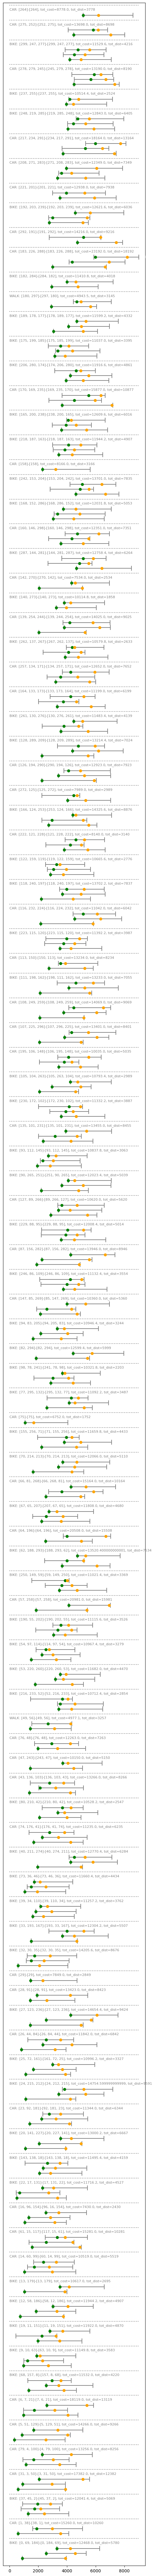

In [18]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)